# Part 1: Theory

## Linear thermoelasticity
Thermoelasticity describes coupling between the elastic deformation of the solid and heat flow in it. Two cases can be distinguished:
- One-way coupling: solid experiences expansion/contraction due to temperature change, and the actual stress depends on the thermal strain:

\begin{align}
\boldsymbol{\sigma}=\mathbf{D}:\left[\boldsymbol{\epsilon}-\alpha(T-T_0)\mathbf{I}\right],
\end{align}

where $\boldsymbol{\sigma}$ is the actual stress, $\boldsymbol{\epsilon}$ is the actual strain, $\mathbf{D}$ is the elasticity tensor, $T-T_0$ is the temperature change and $\alpha$ is the thermal expansion coefficient. However, in the one-way coupling, temperature does not depend on the actual strain. Therefore, this case is also known as *linear thermoelasticity*, see [[Hetnarski et al., 2009]](#hetnarski_2009) for more details.

- Two-way coupling: not only the actual stress depends on the thermal strain, but also temperature depends on the actual strain (e.g. due to the change of density). This case is more complex and will not be considered in this tutorial.

#### Strong form 
The strong form of the thermoelastic problem, in absence of volumetric forces and heat sources reads:

\begin{align}
\label{eq:strong}
\begin{cases}
\nabla\cdot\boldsymbol{\sigma} = 0 &\textrm{in}\; \Omega \\
-\nabla\cdot (k\nabla T)+c\dot{T}=0 &\textrm{in}\; \Omega \\
u = \bar{u} &\textrm{on}\; \Gamma_u \\
T = \bar{T} &\textrm{on}\; \Gamma_T \\
\boldsymbol{\sigma}\cdot\mathbf{n}=\bar{\mathbf{t}} &\textrm{on}\; \Gamma_t \\
-k\nabla T\cdot\mathbf{n} = \bar{q} &\textrm{on}\; \Gamma_q \\
T|_{t=0} = T_0 &\textrm{in}\; \Omega,
\end{cases}
\end{align}

where $k$ is the thermal conductivity, $c$ is the volumetric heat capacity, $\bar{u}$ is the prescribed value of the displacement, $\bar{T}$ is the prescribed value of temperature, $\bar{\mathbf{t}}$ is the prescribed traction and $\bar{q}$ is the prescribed normal component of the heat flux, all defined on the respective parts of the domain boundary, see [Fig. 1](#fig_1), while $T_0$ is the initial value of temperature in the domain.  

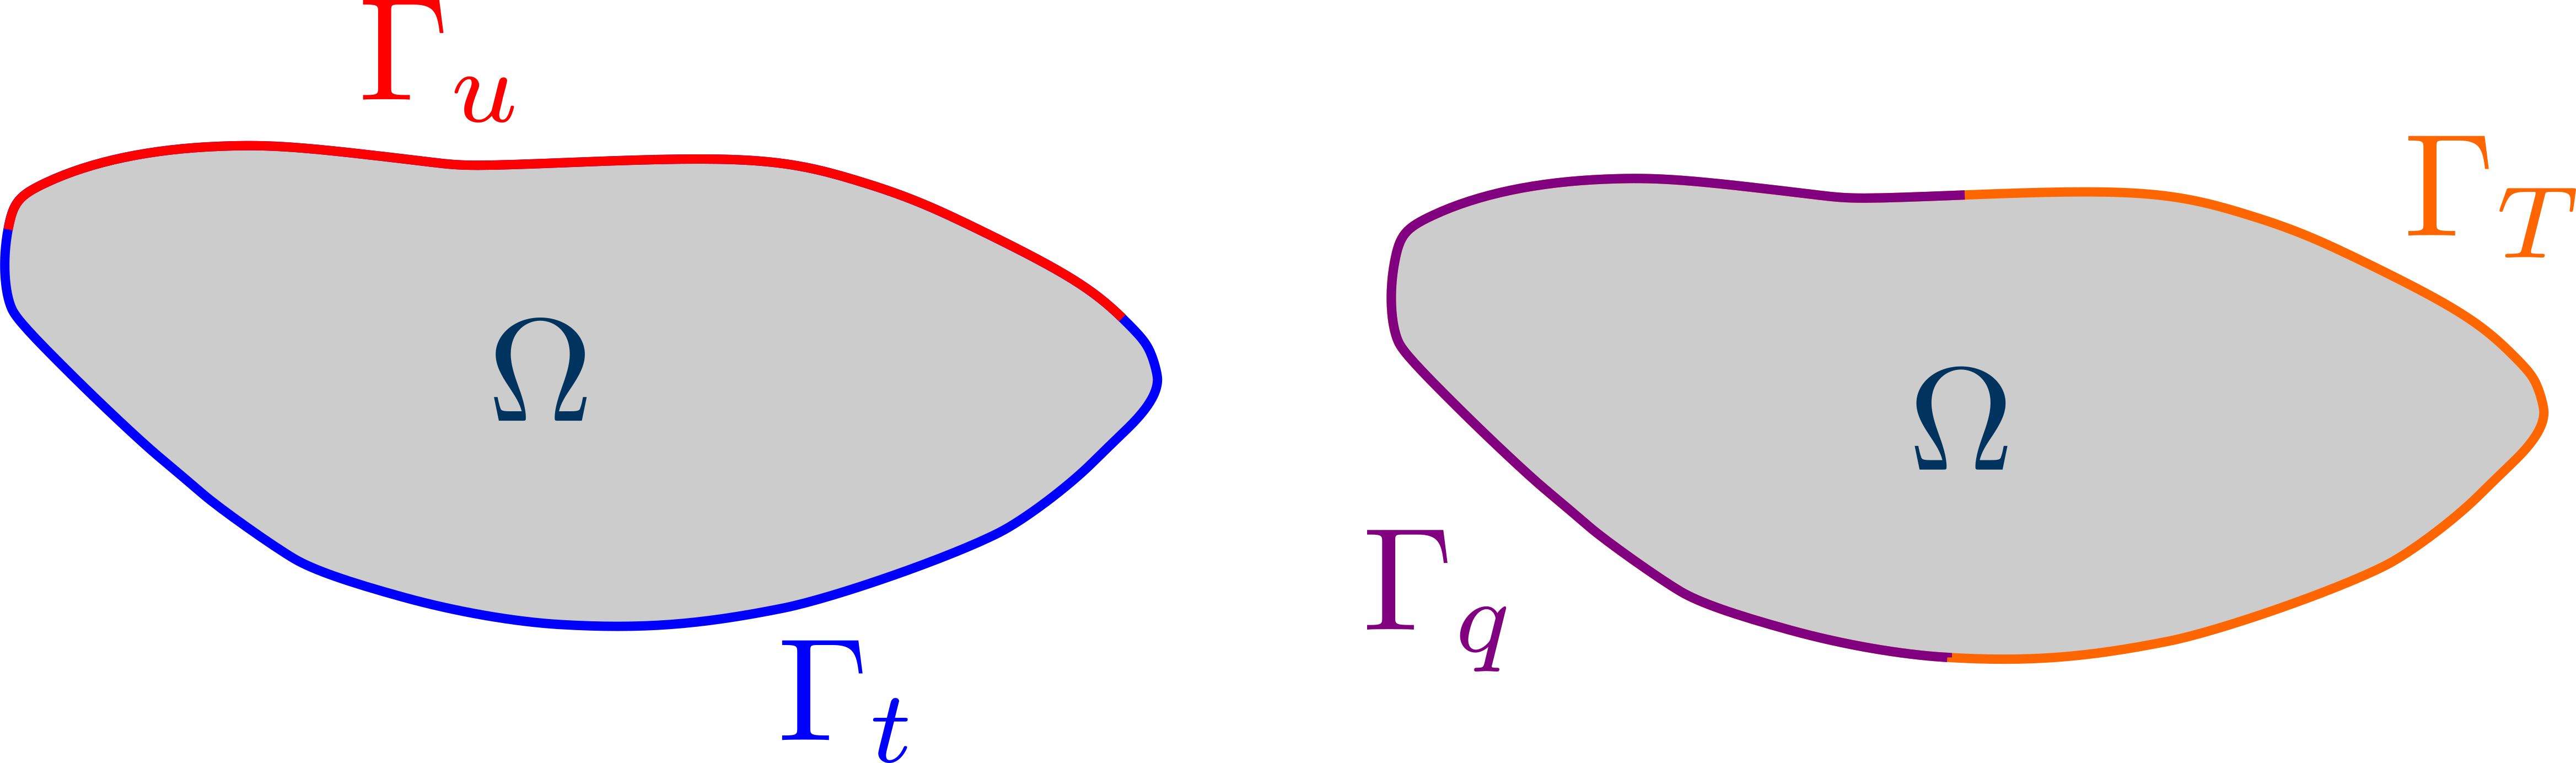

<a id='fig_2'></a> 
    <center><b>Fig. 1. Sketch for the setup of the strong form of the thermoelastic problem.</b></center>

#### Standard coupled weak form
The standard weak form of the coupled problem \eqref{eq:strong} reads:

Find displacement (vector) field $\mathbf{u}\in H^1(\Omega)$ and temperature (scalar) field $T\in H^1(\Omega)$ such that:

\begin{align}
\int_\Omega \boldsymbol{\sigma}:\nabla \delta \mathbf{u} \,\textrm{d}\Omega - \int_{\Gamma_t} \bar{\mathbf{t}} \cdot\delta\mathbf{u}\,\textrm{d}\Gamma &= 0 \quad\forall \delta \mathbf{u}\in \mathbf{H}^1_0(\Omega)\\
\int_\Omega k\nabla T \cdot \nabla\delta T \,\textrm{d}\Omega - \int_{\Gamma_q} \bar{q}\,\delta T \,\textrm{d}\Gamma + \int_\Omega c\dot{T} \delta T \,\textrm{d}\Omega &= 0\quad\forall\, \delta T \in H^1_0(\Omega),
\end{align}

and the following essential boundary conditions hold:
\begin{align}
\begin{cases}
u = \bar{u} &\textrm{on}\; \Gamma_u \\
T = \bar{T} &\textrm{on}\; \Gamma_T \\
\end{cases}
\end{align}

#### Mixed coupled weak form
The mixed weak form of the coupled problem \eqref{eq:strong} reads: 

Find displacement (vector) field $\mathbf{u}\in H^1(\Omega)$, temperature (scalar) field $T\in L^2(\Omega)$ and heat flux (vector) field $\mathbf{q}\in H(\textrm{div}, \Omega)$ such that:

\begin{align}
\int_\Omega \boldsymbol{\sigma}:\nabla \delta \mathbf{u} \,\textrm{d}\Omega - \int_{\Gamma_t} \bar{\mathbf{t}} \cdot\delta\mathbf{u}\,\textrm{d}\Gamma &= 0 \quad\forall \delta \mathbf{u}\in \mathbf{H}^1_0(\Omega)\\
\int_\Omega \nabla\cdot\mathbf{q} \;\delta T \,\textrm{d}\Omega + \int_\Omega c\dot{T} \delta T \,\textrm{d}\Omega &= 0\quad\forall\, \delta T \in L^2(\Omega)\\
\int_\Omega\mathbf{q} \cdot \delta \mathbf{q} \,\textrm{d}\Omega + \int_{\Gamma_T} k\bar{T}\,\delta \mathbf{q}\cdot{n} \,\textrm{d}\Gamma - \int_\Omega k T \,\nabla \cdot\delta\mathbf{q} \,\textrm{d}\Omega &= 0\quad\forall\, \delta \mathbf{q} \in H(\textrm{div}, \Omega),
\end{align}

and the following essential boundary conditions hold:
\begin{align}
\begin{cases}
u = \bar{u} &\textrm{on}\; \Gamma_u \\
\mathbf{q}\cdot \mathbf{n} = \bar{q} &\textrm{on}\; \Gamma_q, \\
\end{cases}
\end{align}
see [[Boffi, 2013]](#boffi_2013) for more details.

### References: 

<a id='hetnarski_2009'></a> 
**[Hetnarski et al., 2009]**  Hetnarski, R.B., Eslami, M.R. and Gladwell, G.M.L., Thermal stresses: advanced theory and applications, Springer, 2009

<a id='boffi_2013'></a> 
**[Boffi et al., 2013]** Boffi D., Brezzi F., Fortin M. Mixed finite element methods and applications, Springer, 2013

<a id='wakeni_2022'></a> 
**[Wakeni et al., 2022]**
Wakeni M et al., International Journal for Numerical Methods in Engineering, 123(14), 2022

# Part 2: Example

The purpose of this tutorial is to demonstrate the advantages of the mixed formulation in the case when the solution of the problem has low regularity, e.g. when it has kinks, see [[Wakeni et al., 2022]](#wakeni_2022) for more details. To consider such case we will solve the problem shown in [Fig. 2](#fig_2): a square plate having a circular hole in the middle, and consisting from two materials, which have different Young's moduli and very distinct heat conductivity coefficients. Initially the whole plate is at 0 degrees, however, the edges of hole are immediately heated to 1000 degrees. We will simulate the heat transfer and associated elastic deformation during the first 50 s. Due to the symmetry of the problem setup, only one quarter of the geometry is considered.

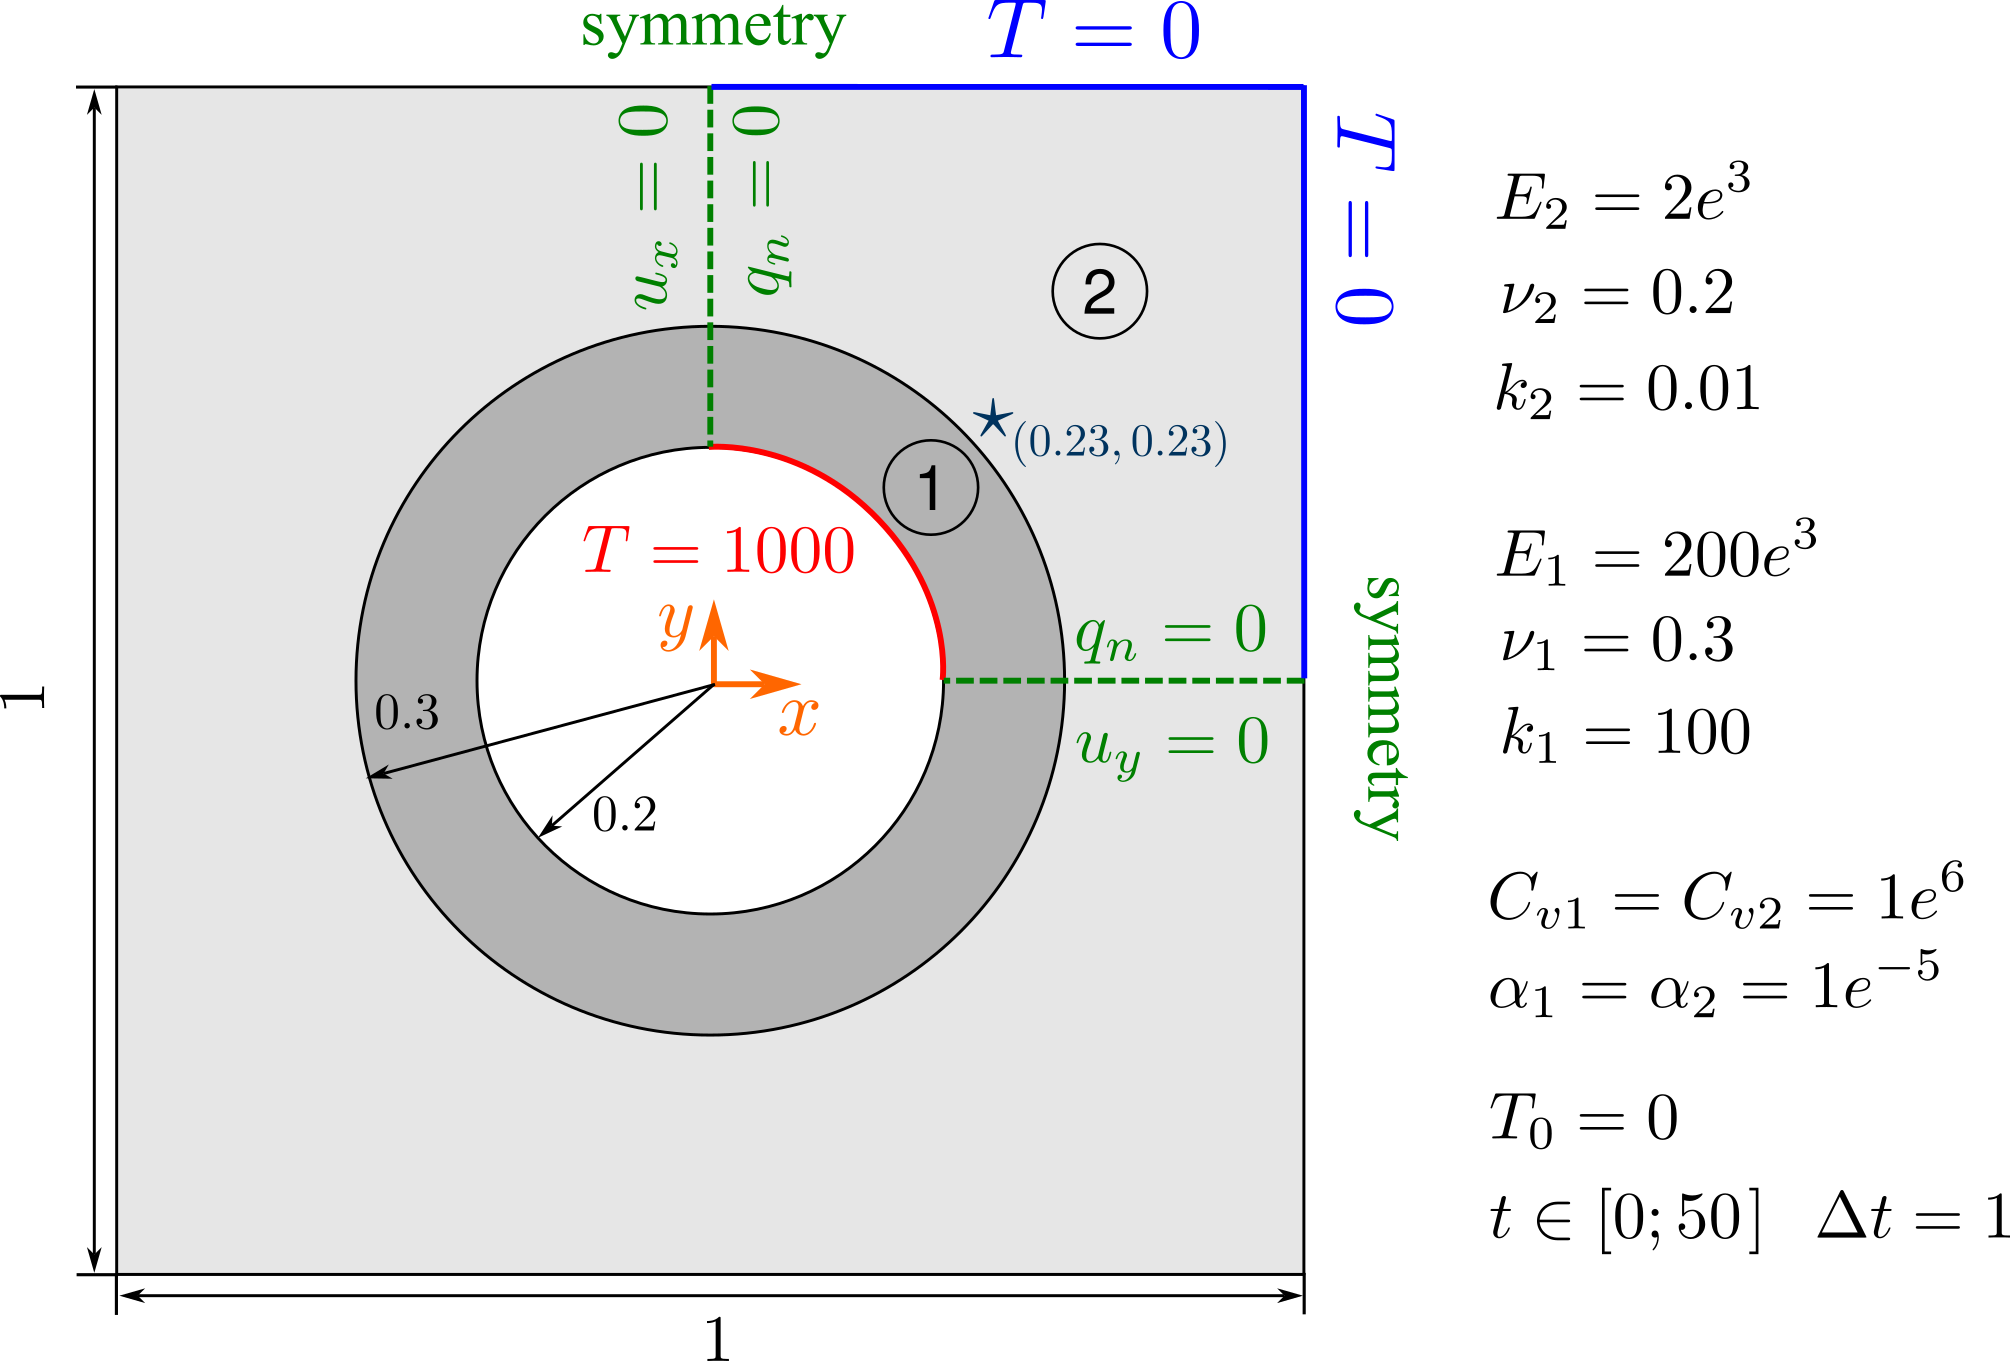

<a id='fig_2'></a> 
    <center><b>Fig. 2. Problem setup.</b></center>

### Importing necessary modules, setting parameters and paths

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
from scipy import optimize
import time
import os
import os.path
import zipfile
import pandas as pd
from scipy.optimize import curve_fit, least_squares
import sys

import gmsh
import math

import matplotlib.image as mpimg
import re

import pyvista as pv
import ipywidgets as widgets
pv.set_plot_theme("document")

plt.rcParams['figure.figsize'] = [12, 9]
plt.rcParams['figure.dpi'] = 300
plt.rcParams['font.family'] = "Serif"
plt.rcParams['font.size'] = 20

from pyvirtualdisplay import Display
display = Display(backend="xvfb", visible=False, size=(1024, 768))
display.start()
    
user_name=!whoami # get user name
user_name=user_name[0]
um_view = "/mofem_install/jupyter/%s/um_view" % user_name

### Define utility functions (mesh generation, running the analysis, results post-processing)

In [ ]:
class AttrDict(dict):
    def __getattr__(self, attr):
        if attr in self:
            return self[attr]
        raise AttributeError(f"'AttrDict' object has no attribute '{attr}'")

def generate_mesh(params):    
    gmsh.initialize()
    
    gmsh.option.setNumber("General.Verbosity", 3)
    
    tol = 0.001
    L = params.side_length
    R1 = params.hole_radius
    R2 = params.interface_radius
    
    point1 = gmsh.model.geo.addPoint(0, 0, 0, tol)
    point2 = gmsh.model.geo.addPoint(R1, 0, 0, tol)
    point3 = gmsh.model.geo.addPoint(0, R1, 0, tol)
    
    point4 = gmsh.model.geo.addPoint(R2, 0, 0, tol)
    point5 = gmsh.model.geo.addPoint(0, R2, 0, tol)
    
    point6 = gmsh.model.geo.addPoint(L, 0, 0, tol)
    point7 = gmsh.model.geo.addPoint(L, L, 0, tol)
    point8 = gmsh.model.geo.addPoint(0, L, 0, tol)
    
    line1 = gmsh.model.geo.addLine(point5, point3);
    circle2 = gmsh.model.geo.addCircleArc(point3, point1, point2);
    
    line3 = gmsh.model.geo.addLine(point2, point4);
    circle4 = gmsh.model.geo.addCircleArc(point4, point1, point5);

    
    line5 = gmsh.model.geo.addLine(point4, point6);
    line6 = gmsh.model.geo.addLine(point6, point7);
    line7 = gmsh.model.geo.addLine(point7, point8);
    line8 = gmsh.model.geo.addLine(point8, point5);
    
    curve_loop_1 = gmsh.model.geo.addCurveLoop([line1, circle2, line3, circle4])
    curve_loop_2 = gmsh.model.geo.addCurveLoop([line5, line6, line7, line8, -circle4])
    
    plane_surface_1 = gmsh.model.geo.addPlaneSurface([curve_loop_1])
    plane_surface_2 = gmsh.model.geo.addPlaneSurface([curve_loop_2])
    
    gmsh.model.geo.synchronize()
    
    gmsh.option.setNumber("Mesh.MeshSizeMin", params.element_size)
    gmsh.option.setNumber("Mesh.MeshSizeMax", params.element_size)
    
    if params.method == "standard":
        gmsh.model.geo.extrude([(2, plane_surface_1), (2, plane_surface_2)], 0, 0, 0.05)  
        gmsh.model.geo.synchronize()
    
        domain1 = gmsh.model.addPhysicalGroup(3, [1])
        gmsh.model.setPhysicalName(3, domain1, "DOMAIN_1")
        
        domain2 = gmsh.model.addPhysicalGroup(3, [2])
        gmsh.model.setPhysicalName(3, domain2, "DOMAIN_2")
        
        temp_1 = gmsh.model.addPhysicalGroup(2, [21])
        gmsh.model.setPhysicalName(2, temp_1, 'INTERNAL')
        
        temp_2 = gmsh.model.addPhysicalGroup(2, [44, 48])
        gmsh.model.setPhysicalName(2, temp_2, 'EXTERNAL')
        
        disp_x1 = gmsh.model.addPhysicalGroup(2, [52])
        gmsh.model.setPhysicalName(2, disp_x1, 'SYMM_X1')
        
        disp_x2 = gmsh.model.addPhysicalGroup(2, [17])
        gmsh.model.setPhysicalName(2, disp_x2, 'SYMM_X2')
        
        disp_y1 = gmsh.model.addPhysicalGroup(2, [25])
        gmsh.model.setPhysicalName(2, disp_y1, 'SYMM_Y1')
        
        disp_y2 = gmsh.model.addPhysicalGroup(2, [40])
        gmsh.model.setPhysicalName(2, disp_y2, 'SYMM_Y2')
        
        disp_z1 = gmsh.model.addPhysicalGroup(2, [1, 2])
        gmsh.model.setPhysicalName(2, disp_z1, "SYMM_Z1")
        
        disp_z2 = gmsh.model.addPhysicalGroup(2, [30, 57])
        gmsh.model.setPhysicalName(2, disp_z2, "SYMM_Z2")
        
        gmsh.model.mesh.generate(3)
        
    if params.method == "mixed":
        domain1 = gmsh.model.addPhysicalGroup(2, [plane_surface_1])
        gmsh.model.setPhysicalName(2, domain1, "DOMAIN_1")

        domain2 = gmsh.model.addPhysicalGroup(2, [plane_surface_2])
        gmsh.model.setPhysicalName(2, domain2, "DOMAIN_2")

        temp_1 = gmsh.model.addPhysicalGroup(1, [circle2])
        gmsh.model.setPhysicalName(1, temp_1, 'INTERNAL')

        temp_2 = gmsh.model.addPhysicalGroup(1, [line6, line7])
        gmsh.model.setPhysicalName(1, temp_2, 'EXTERNAL')

        disp_x1 = gmsh.model.addPhysicalGroup(1, [line8])
        gmsh.model.setPhysicalName(1, disp_x1, 'SYMM_X1')

        disp_x2 = gmsh.model.addPhysicalGroup(1, [line1])
        gmsh.model.setPhysicalName(1, disp_x2, 'SYMM_X2')

        disp_y1 = gmsh.model.addPhysicalGroup(1, [line3])
        gmsh.model.setPhysicalName(1, disp_y1, 'SYMM_Y1')

        disp_y2 = gmsh.model.addPhysicalGroup(1, [line5])
        gmsh.model.setPhysicalName(1, disp_y2, 'SYMM_Y2')
    
        gmsh.model.mesh.generate(2)
    
    med_file = params.mesh_file + ".med"
    gmsh.write(med_file)

    gmsh.finalize()
    
    h5m_file=params.mesh_file + ".h5m"    

    !{um_view}/bin/read_med -med_file {med_file} -meshsets_config config_files/elastic_blocks_{params.method}.cfg -output_file {h5m_file} -log_sl error
    !{um_view}/bin/add_meshsets -my_file {h5m_file} -meshsets_config config_files/thermal_blocks_{params.method}.cfg -output_file {h5m_file} -log_sl error
    
    if params.show_mesh:
        vtk_file=params.mesh_file + ".vtk"
        !mbconvert {h5m_file} {vtk_file}

        mesh = pv.read(vtk_file)
        mesh = mesh.shrink(0.95)

        p = pv.Plotter(notebook=True)
        p.add_mesh(mesh, smooth_shading=False)

        p.camera_position = "xy"
        p.show(jupyter_backend='ipygany')
    
    return
        
def run_mofem_thermo_elastic(params):    
    params.part_file = params.mesh_file + "_" + str(params.nproc) + "p.h5m"
    
    if params.method == "standard":
        dim = 3
    if params.method == "mixed":
        dim = 2
    
    !{um_view}/bin/mofem_part -my_file {params.mesh_file + ".h5m"} -my_nparts {params.nproc} -output_file {params.part_file} -dim {dim} -adj_dim 1

    !rm -rf {params.method}/out* sol*
    
    if params.method == "standard":
        !export OMPI_MCA_btl_vader_single_copy_mechanism=none && \
        nice -n 10 mpirun --oversubscribe --allow-run-as-root \
        -np {params.nproc} {um_view}/thermal/thermal_unsteady \
        -my_file {params.part_file} \
        -my_order {params.order} \
        -log_sl {params.verbosity_level} \
        2>&1 | tee {params.log_file}
        
        elastic_order = params.order + 1
            
        !export OMPI_MCA_btl_vader_single_copy_mechanism=none && \
        nice -n 10 mpirun --oversubscribe --allow-run-as-root \
        -np {params.nproc} {um_view}/elasticity/elasticity \
        -my_file solution.h5m \
        -my_order {elastic_order} \
        -log_sl {params.verbosity_level} \
        -field_eval_coords {params.field_eval_coords[0]},{params.field_eval_coords[1]},{params.field_eval_coords[2]} \
        2>&1 | tee {params.log_file}
       
    if params.method == "mixed":
        !export OMPI_MCA_btl_vader_single_copy_mechanism=none && \
        nice -n 10 mpirun --oversubscribe --allow-run-as-root \
        -np {params.nproc} {um_view}/tutorials/adv-2/thermo_elastic_2d \
        -file_name {params.part_file} \
        -order {params.order} \
        -time_scalar_file config_files/load_history.in \
        -log_sl {params.verbosity_level} \
        -field_eval_coords {params.field_eval_coords[0]},{params.field_eval_coords[1]} \
        2>&1 | tee {params.log_file}

    !mkdir -p {params.method}
    !mv out* {params.method}/
    
    if params.convert:
        !convert.py -np {params.nproc} {params.method}/out*
        
def parse_log_file(params):
    res = AttrDict()
    with open(params.log_file, "r") as log_file:
        for line in log_file:
            line = line.strip()
            if "nb global dofs" in line:
                res.dof_num = int(line.split()[13])
            if "Eval point T" in line or "Eval point TEMP" in line:
                res.temp = float(line.split()[6])
            if "Eval point U" in line or "Eval point DISPLACEMENT" in line:
                res.disp = float(line.split()[7])
            if "Eval point U_GRAD" in line or "Eval point DISPLACEMENT_GRAD" in line:
                res.disp_grad = float(line.split()[7])
    return res

def show_results(params):
    out_to_vtk = !ls -c1 {params.method}/{params.show_file}_*vtk
    last_file=out_to_vtk[0]

    mesh = pv.read(last_file[:-3] + "vtk")
    
    mesh = mesh.warp_by_vector(vectors=params.warp_field, factor=params.warp_factor)
    if params.show_edges:
        mesh=mesh.shrink(0.95)
        
    jupyter_backend='ipygany'
    cmap = "turbo"

    p = pv.Plotter(notebook=True)
    p.add_mesh(mesh, scalars=params.show_field, component=params.component, smooth_shading=True, cmap=cmap)
    p.camera_position = "xy"
    
    p.enable_parallel_projection()
    p.enable_image_style()
    
    p.show(jupyter_backend=jupyter_backend)
    
def show_field(params):
    if params.method == "standard":
        params.show_file = "out_skin"
        params.warp_field = "DISPLACEMENT"
    if params.method == "mixed":
        params.show_file = "out"
        params.warp_field = "U"
    show_results(params)    

### Dictionary defining all relevant parameters for solving the problem

In [ ]:
params = AttrDict() # Attribute dictionary for storing the parameters

# Pre-processing parameters
params.mesh_file = "plate_with_hole" # no file extension needed
params.side_length = 0.5 # side length of the domain
params.hole_radius = 0.2 # radius of the hole in ther plate
params.interface_radius = 0.3 # radius of the interface between the sub-domains 
params.element_size = 0.05 # element size in the mesh
params.triangle_mesh = True # set True to use triangle mesh, and False for quad mesh
params.show_mesh = True # set True to show the generated mesh

# Solution parameters
params.method = "mixed" # or "standard"
params.log_file = "log" # log file name
params.convert = True # set True to convert results for-postprocessing
params.nproc = 4 # number of cores/processors to use
params.order = 1 # approximation order p of the field T (fields q and u in the mixed formulation have order p+1)
params.verbosity_level = "inform" # you can try "verbose" if needed

# Post-processing parameters
params.field_eval_coords = (0.23, 0.23, 0) # point to evaluate the solution (for convergence test)
params.show_edges = True 
params.component = None

#### Generate the mesh

In [ ]:
params.element_size = 0.025
params.show_mesh = True
params.method = "mixed"
generate_mesh(params)

#### Solve the problem using the mixed formulation

In [ ]:
params.order = 1 # <- TRY CHANGING THIS
params.method = "mixed"
params.convert = True
run_mofem_thermo_elastic(params)

#### Solve the problem using the standard formulation

In [ ]:
params.method = "standard"
params.element_size = 0.025 # <- TRY CHANGING THIS
params.show_mesh = False
generate_mesh(params)

params.verbosity_level = "verbose"
params.order = 1 # <- TRY CHANGING THIS
params.convert = True
run_mofem_thermo_elastic(params)

### Visualise and compare the results

In [ ]:
params.method = "mixed"
params.show_field = "T" 
#try "T", "FLUX", "U", "STRAIN", "STRESS"
params.component = 0
# try 0,1,2 for vectors and 0-8 for tensors
params.warp_factor = 1e2
# try increasing/decreasing the warp factor
params.show_edges = False

show_field(params)

In [ ]:
params.method = "standard"
params.show_field = "TEMP" 
#try "TEMP", "DISPLACEMENT", "DISPLACEMENT_GRAD", STRESS"
params.component = 0
# try 0,1,2 for vectors and 0-8 for tensors
params.warp_factor = 1e2 
# try increasing/decreasing the warp factor
params.show_edges = False

show_field(params)

### Convergence study

In [ ]:
elem_size = [0.05, 0.025, 0.0125]
params.order = 1
params.show_mesh = False
params.convert = False
res_mixed = []
res_standard = []

def get_temp_list(res_list):
    return [res.temp for res in res_list]

def get_disp_list(res_list):
    return [res.disp for res in res_list]

def get_disp_grad_list(res_list):
    return [res.disp_grad for res in res_list]

for h in elem_size:
    params.element_size = h
    params.method = "mixed"
    generate_mesh(params)
    run_mofem_thermo_elastic(params)
    res_mixed.append(parse_log_file(params))
    
    params.method = "standard"
    generate_mesh(params)
    run_mofem_thermo_elastic(params)
    res_standard.append(parse_log_file(params))

#### Compare mesh convergence for temperature (at evaluation point)

In [ ]:
plt.semilogx(elem_size, get_temp_list(res_mixed), marker='o', ms=8, lw=2, label="mixed")
plt.semilogx(elem_size, get_temp_list(res_standard), marker='d', ms=8, lw=2, label="standard")

custom_tick_labels = [str(h) for h in elem_size]

plt.xlabel("Element size, h")
plt.ylabel("Temperature at the evaluation point")
plt.xticks(elem_size, custom_tick_labels)
plt.grid(ls="--")
plt.title("Temperature convergence")
plt.legend()

plt.show()

#### Compare mesh convergence for displacement (at evaluation point)

In [ ]:
plt.semilogx(elem_size, get_disp_list(res_mixed), marker='o', ms=8, lw=2, label="mixed")
plt.semilogx(elem_size, get_disp_list(res_standard), marker='d', ms=8, lw=2, label="standard")

custom_tick_labels = [str(h) for h in elem_size]

plt.xlabel("Element size, h")
plt.ylabel("Displacement magnitude at the evaluation point")
plt.xticks(elem_size, custom_tick_labels)
plt.grid(ls="--")
plt.title("Displacement convergence")
plt.legend()

plt.show()

#### Compare mesh convergence for strain (at evaluation point)

In [ ]:
plt.semilogx(elem_size, get_disp_grad_list(res_mixed), marker='o', ms=8, lw=2, label="mixed")
plt.semilogx(elem_size, get_disp_grad_list(res_standard), marker='d', ms=8, lw=2, label="standard")

custom_tick_labels = [str(h) for h in elem_size]

plt.xlabel("Element size, h")
plt.ylabel("Strain trace at the evaluation point")
plt.xticks(elem_size, custom_tick_labels)
plt.grid(ls="--")
plt.title("Strain convergence")
plt.legend()

plt.show()